# Notebook example on how to read-only with xarray files on the metno s3 store

key, secret key and endpoint can also be used to browse the store in jupyterlab bucket explorer

In [1]:
import s3fs
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

## Data for stations is in two folders: 

2012-2015 is in: 
```python 
'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full'
```
and 2015-2018 in:
```python 
'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245'
```


## Example: check files in OsloAero_intBVOC_f09_f09_mg17_full

In [6]:
s3.ls('escience2022/Sara/OsloAeroSec')

['escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_concat_subs_-.nc',
 'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9.nc',
 'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9_addNd.nc',
 'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2016-01-01-2017-01-01_concat_subs_-.nc',
 'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2016-01-01-2017-01-01_f_concat_subs_lon11.88_lat78.9.nc',
 'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2017-01-01-2018-01-01_concat_subs_-.nc',
 'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2017-01-01-2018-01-01_f_concat_subs_lon11.88_lat78.9.nc']

## To ease imports, you can pick out the files you want to look at and find the files like this: 

In [ ]:
varl = ['N100','N200','N50'] 

In [ ]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

In [ ]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [ ]:
filelist = [make_file_path_for_var(v) for v in varl]

In [ ]:
filelist

['s3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N200_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N50_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc']

In [ ]:
'escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_concat_subs_-.nc'

In [9]:
base_path = 's3://escience2022/Sara/OsloAeroSec/'
fn = 'OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_concat_subs_-.nc'

In [12]:
from  pathlib import Path

In [17]:
filepath = base_path  +fn

In [18]:
filepath

's3://escience2022/Sara/OsloAeroSec/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_concat_subs_-.nc'

In [24]:
from dask.diagnostics import ProgressBar 

In [ ]:
with ProgressBar():
    xr.open_mfdataset([s3.open(filepath)])

### Cloud properties: 

In [18]:
varl = ['AWNC', 'AREL', 'FREQL', 'N100','N50'] 

In [19]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

In [20]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [21]:
filelist = [make_file_path_for_var(v) for v in varl]

In [22]:
filelist

['s3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/AWNC_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/AREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/FREQL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/N50_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc']

In [23]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds = xr.open_mfdataset(list_of_s3_obj)

ds

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26352, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables:
    AREL      (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    AWNC      (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    FREQL     (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    N100      (location, time, lev) float64 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>

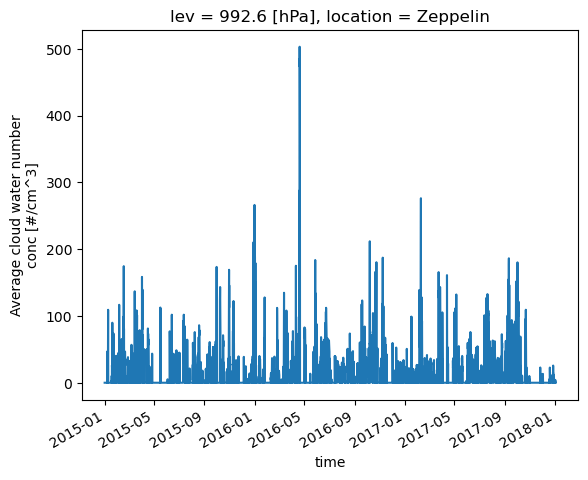

In [24]:
ds.isel(lev=-1).sel(location='Zeppelin')['AWNC'].plot()

## Some facts about cloud variables in NorESM

- AWNC is the cloud droplet number concentration
- AREL is the effective radius
Both of these properties are weighted by cloud fraction! What does this mean?? It means that to get the actual value, you need to divide by the cloud fraction. That is FREQL.

so 
$$AWNC = AWNC_{incld} \cdot FREQL$$
So if you want in cloud values (incld) you need to divide:
$$AWNC_{incld} = \frac{AWNC} {FREQL }$$

ALSO! If you want to average values over time, it sometimes makes sense to do a weighted average, where you weight by cloud fraction. This means that the times when you have lots of clouds count more. To do this, you essentially just need to average $FREQL$ and $AWNC$ separately first and then divide (you can do the math to understand why :) ).

In [ ]:
a